In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1ο ερώτημα
Στο 1ο ερώτημα έχω απαντήσει σε όλα τα υποερωτήματα και στο BONUS. Δουλεύω με παρόμοιο τρόπο όπως στην εργασία 1. Και όπως αναφέρθηκε στις συζητήσεις στο eclass κρατάω 1000 δείγματα από κάθε χρονιά και συγκεκριμένα μιας και υπάρχουν πολλά rows με θετικά sentiments έκανα και μια επιλογή με αρνητικές λέξεις ώστε να αυξήσω το πλήθος των αρνητικών sentiment.

In [4]:
pip install nltk

In [3]:
reviews_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/reviews.csv")
mreviews_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/reviews.csv")
freviews_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/reviews.csv")


reviews3_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/september/reviews.csv")
mreviews3_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/june/reviews.csv")
freviews3_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/march/reviews.csv")

Κάνω ένα απλό preprocessing ώστε να αφαιρεθούν όσα αναφέρονται στην εκφώνηση καθώς και stop words

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('greek'))

stop_words_eng = set(stopwords.words('english'))

def clean_text(text):

    if pd.isna(text):
        return ""
    # Μετατροπή της τιμής σε κείμενο
    text = str(text)
    # Μετατροπή σε μικρά γράμματα
    text = text.lower()
    # Αφαίρεση URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Αφαίρεση emojis
    text = re.sub(r'[^\w\s,]', '', text)  # Αφαιρεί ό,τι δεν είναι λέξη, κενό ή κόμμα
    # Αφαίρεση σημείων στίξης
    text = re.sub(r'[^\w\s]', '', text)
    # Αφαίρεση stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split() if word not in stop_words_eng])
    return text


reviews_df['review'] = reviews_df['comments'].apply(clean_text)
mreviews_df['review'] = mreviews_df['comments'].apply(clean_text)
freviews_df['review'] = freviews_df['comments'].apply(clean_text)


reviews3_df['review'] = reviews3_df['comments'].apply(clean_text)
mreviews3_df['review'] = mreviews3_df['comments'].apply(clean_text)
freviews3_df['review'] = freviews3_df['comments'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
pip install swifter whatthelang

Κάνω αναγνώριση γλώσσας για να μην κρατήσω κάποια reviews που έχουν κινέζικους χαρακτήρες

In [7]:
import swifter
from whatthelang import WhatTheLang


wtl = WhatTheLang()

def is_english(text):
    try:
        if not isinstance(text, str) or len(text) < 3:
            return False
        return wtl.predict_lang(text) == 'en'
    except Exception as e:
        return False

reviews_df['is_english'] = reviews_df['review'].swifter.apply(is_english)
reviews_df = reviews_df[reviews_df['is_english']].drop(columns='is_english')
mreviews_df['is_english'] = mreviews_df['review'].swifter.apply(is_english)
mreviews_df = mreviews_df[mreviews_df['is_english']].drop(columns='is_english')
freviews_df['is_english'] = freviews_df['review'].swifter.apply(is_english)
freviews_df = freviews_df[freviews_df['is_english']].drop(columns='is_english')


reviews3_df['is_english'] = reviews3_df['review'].swifter.apply(is_english)
reviews3_df = reviews3_df[reviews3_df['is_english']].drop(columns='is_english')
mreviews3_df['is_english'] = mreviews3_df['review'].swifter.apply(is_english)
mreviews3_df = mreviews3_df[mreviews3_df['is_english']].drop(columns='is_english')
freviews3_df['is_english'] = freviews3_df['review'].swifter.apply(is_english)
freviews3_df = freviews3_df[freviews3_df['is_english']].drop(columns='is_english')



Pandas Apply:   0%|          | 0/287433 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/279833 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/276611 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/579991 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/579991 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/538455 [00:00<?, ?it/s]

In [8]:
combined_df = pd.concat([reviews_df, mreviews_df, freviews_df], ignore_index=True)
combined_df3 = pd.concat([reviews3_df, mreviews3_df, freviews3_df], ignore_index=True)

Αφού έχω συνδυάσει τα επιμέρους df αφαιρώ τα διπλότυπα

In [9]:
combined_df = combined_df.drop_duplicates(subset='comments')
combined_df3 = combined_df3.drop_duplicates(subset='comments')
combined_df3 = combined_df3[['id', 'listing_id', 'comments','review']]
combined_df = combined_df3[['id', 'listing_id', 'comments','review']]

In [10]:
pip install transformers torch


In [11]:
pip install langdetect

In [12]:
print(combined_df.shape,combined_df3.shape,freviews_df.shape)


(449157, 4) (449157, 4) (216451, 7)


Επιλέγω θετικές και αρνητικές λέξεις ώστε να βρω περισσότερα αρνητικά sentiments

In [13]:
import pandas as pd


negative_words = ['awful', 'terrible', 'worst', 'horrible', 'bad']
positive_words = ['great', 'excellent', 'amazing', 'wonderful', 'good']

negative_reviews = combined_df[combined_df['review'].str.contains('|'.join(negative_words), case=False, na=False)]
positive_reviews = combined_df[combined_df['review'].str.contains('|'.join(positive_words), case=False, na=False)]


negative_reviews = negative_reviews.drop_duplicates(subset=['listing_id'])
positive_reviews = positive_reviews.drop_duplicates(subset=['listing_id'])


negative_sample = negative_reviews.sample(n=700, replace=False) if len(negative_reviews) > 500 else negative_reviews
positive_sample = positive_reviews.sample(n=700, replace=False) if len(positive_reviews) > 500 else positive_reviews


df = pd.concat([negative_sample, positive_sample], ignore_index=True)


print(df.shape)

(1400, 4)


In [14]:
import pandas as pd


negative_reviews = combined_df3[combined_df3['review'].str.contains('|'.join(negative_words), case=False, na=False)]
positive_reviews = combined_df3[combined_df3['review'].str.contains('|'.join(positive_words), case=False, na=False)]


negative_reviews = negative_reviews.drop_duplicates(subset=['listing_id'])
positive_reviews = positive_reviews.drop_duplicates(subset=['listing_id'])


negative_sample = negative_reviews.sample(n=700, replace=False) if len(negative_reviews) > 500 else negative_reviews
positive_sample = positive_reviews.sample(n=700, replace=False) if len(positive_reviews) > 500 else positive_reviews


df3 = pd.concat([negative_sample, positive_sample], ignore_index=True)


print(df3.shape)

(1400, 4)


In [15]:
df1 = df.drop_duplicates(subset=['listing_id'])
df1 = df1.head(1000)

In [16]:
df3 = df3.drop_duplicates(subset=['listing_id'])
df3 = df3.head(1000)

In [17]:
pip install transformers

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Χρησιμοποιώ το twitter roberta base sentiment
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [28]:
def scores_roberta(example):
  encoded_text = tokenizer(example,return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'neg' : scores[0],
      'neu' : scores[1],
      'pos' : scores[2]
  }
  return scores_dict

In [30]:
res = {}
df = df1
from tqdm import tqdm
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
      text = row['review']
      myid = row['listing_id']
      result = scores_roberta(text)
      both = {**result}
      res[myid] = both
    except RuntimeError as e:
       print(f'RuntimeError for id {myid}: {str(e)}')
    except IndexError as e:
       print(f'IndexError for id {myid} with text "{text}": {str(e)}')

 26%|██▌       | 257/1000 [02:49<02:38,  4.69it/s]

RuntimeError for id 31195855: The expanded size of the tensor (516) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 516].  Tensor sizes: [1, 514]


100%|██████████| 1000/1000 [07:26<00:00,  2.24it/s]


In [31]:
res2 = {}

from tqdm import tqdm
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    try:
      text = row['review']
      myid = row['listing_id']
      result = scores_roberta(text)
      both = {**result}
      res2[myid] = both
    except RuntimeError as e:
       print(f'RuntimeError for id {myid}: {str(e)}')
    except IndexError as e:
       print(f'IndexError for id {myid} with text "{text}": {str(e)}')

100%|██████████| 1000/1000 [06:35<00:00,  2.53it/s]


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'listing_id'})
results_df = results_df.merge(df, how='left')

In [33]:
results_df3 = pd.DataFrame(res2).T
results_df3 = results_df3.reset_index().rename(columns={'index': 'listing_id'})
results_df3 = results_df3.merge(df3, how='left')

In [34]:
pip install pandas seaborn matplotlib

Παρακάτω είναι οι γραφικές για το sentiment με την πάροδο του χρόνου στο 2023 τα positive sentiments είναι ελάχιστα μειωμένα σε σχέση με το 2019

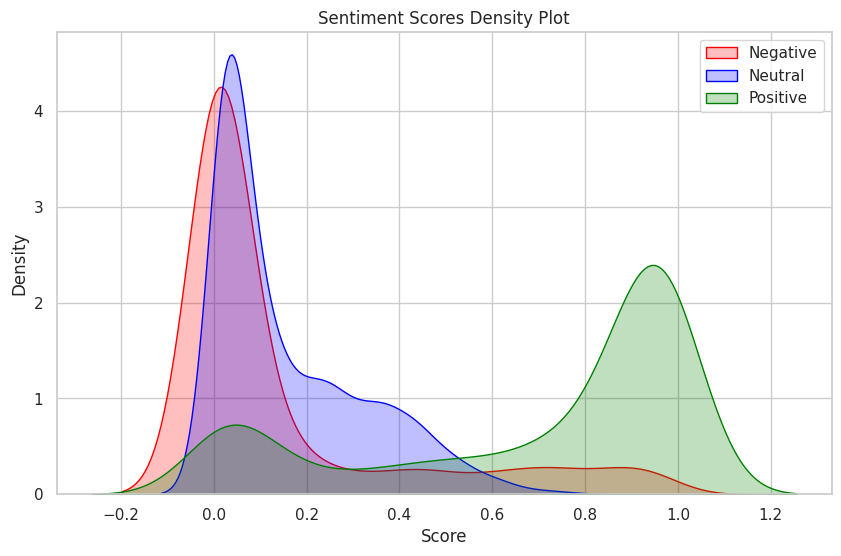

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(results_df['neg'], color="red", label="Negative", fill=True)
sns.kdeplot(results_df['neu'], color="blue", label="Neutral", fill=True)
sns.kdeplot(results_df['pos'], color="green", label="Positive", fill=True)


plt.title('Sentiment Scores Density Plot')
plt.xlabel('Score')
plt.ylabel('Density')


plt.legend()

plt.show()

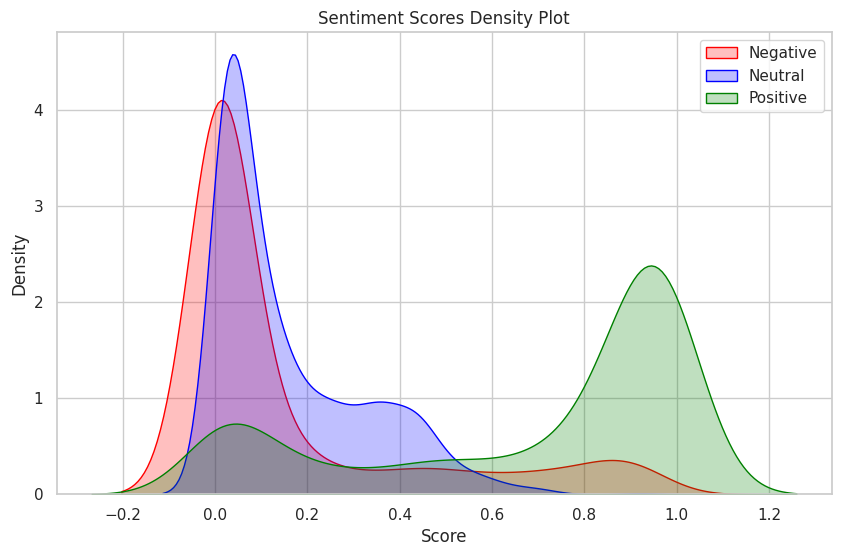

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.kdeplot(results_df3['neg'], color="red", label="Negative", fill=True)
sns.kdeplot(results_df3['neu'], color="blue", label="Neutral", fill=True)
sns.kdeplot(results_df3['pos'], color="green", label="Positive", fill=True)


plt.title('Sentiment Scores Density Plot')
plt.xlabel('Score')
plt.ylabel('Density')

plt.legend()


plt.show()

sentiment
Positive    759
Negative    150
Neutral      90
Name: count, dtype: int64


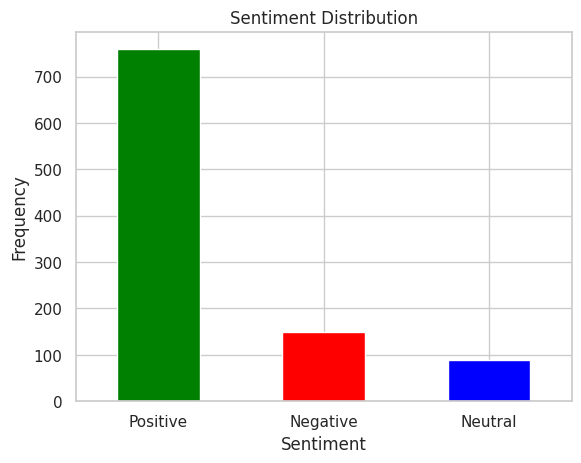

In [37]:
import pandas as pd


results_df['sentiment'] = results_df[['neg', 'neu', 'pos']].idxmax(axis=1)


results_df['sentiment'] = results_df['sentiment'].map({'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive'})


sentiment_counts = results_df['sentiment'].value_counts()

print(sentiment_counts)

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

sentiment
Positive    754
Negative    161
Neutral      85
Name: count, dtype: int64


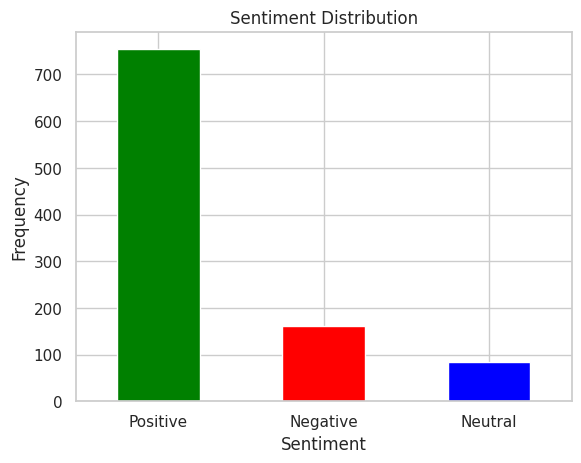

In [38]:
import pandas as pd


results_df3['sentiment'] = results_df3[['neg', 'neu', 'pos']].idxmax(axis=1)


results_df3['sentiment'] = results_df3['sentiment'].map({'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive'})


sentiment_counts = results_df3['sentiment'].value_counts()

print(sentiment_counts)

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [169]:
listings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/listings.csv")
mlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/listings.csv")
flistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/listings.csv")

listings_df3 = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/september/listings.csv")
mlistings_df3 = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/june/listings.csv")
flistings_df3 = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/march/listings.csv")

<ipython-input-169-f6785c2c3204>:1: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/listings.csv")
<ipython-input-169-f6785c2c3204>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  mlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/listings.csv")
<ipython-input-169-f6785c2c3204>:3: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  flistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/listings.csv")


In [170]:
combined_listings_df = pd.concat([listings_df, flistings_df, mlistings_df], ignore_index=True)
combined_listings_df3 = pd.concat([listings_df, flistings_df, mlistings_df], ignore_index=True)

In [171]:
combined_listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20190413015557,2019-04-13,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Athens Furnished Apartment No6 is an excellent...,Athens Furnished Apartment No6 is 3-bedroom ap...,none,Ampelokipi district is nice multinational and ...,...,t,f,strict_14_with_grace_period,f,f,8,8,0,0,0.2


In [172]:
results_df['rev_id'] = results_df['id']
results_df.drop(columns='id', inplace=True)


In [173]:
results_df3['rev_id'] = results_df3['id']
results_df3.drop(columns='id', inplace=True)


Προσθέτω και τις γειτονιές ώστε να κάνω το bonus

In [174]:
results_df = results_df.merge(combined_listings_df[['id', 'neighbourhood']], left_on='listing_id', right_on='id', how='left')
results_df.drop(columns='id', inplace=True)

results_df3 = results_df3.merge(combined_listings_df3[['id', 'neighbourhood']], left_on='listing_id', right_on='id', how='left')
results_df3.drop(columns='id', inplace=True)

In [175]:
results_df.drop_duplicates(subset=['listing_id'],inplace=True)
results_df.shape

(999, 9)

In [176]:
results_df3.drop_duplicates(subset=['listing_id'],inplace=True)
results_df3.shape

(999, 9)

In [177]:
results_df.head()

,listing_id,neg,neu,pos,comments,review,sentiment,rev_id,neighbourhood
0,1216176,0.003715,0.041920,0.954365,It is rare in the Airbnb world to enter an apa...,rare airbnb world enter apartment look exactly...,Positive,332384360,Plaka
3,21874640,0.004309,0.060271,0.935421,Great location for our stay in Athens. Walkabl...,great location stay athens walkable distance m...,Positive,601964658087757322,Koukaki
6,26832989,0.051602,0.215179,0.733219,The place is beautiful as per the pictures and...,place beautiful per pictures good location goo...,Positive,765553455,Neos Kosmos
9,6468915,0.005527,0.041633,0.952840,Five star. Fantastic location - you can walk e...,five star fantastic location walk everywhere w...,Positive,285974546,Plaka
12,53406784,0.106649,0.283316,0.610035,We had a great stay. The host was very helpful...,great stay host helpful responsive house great...,Positive,787506006866299812,NaN


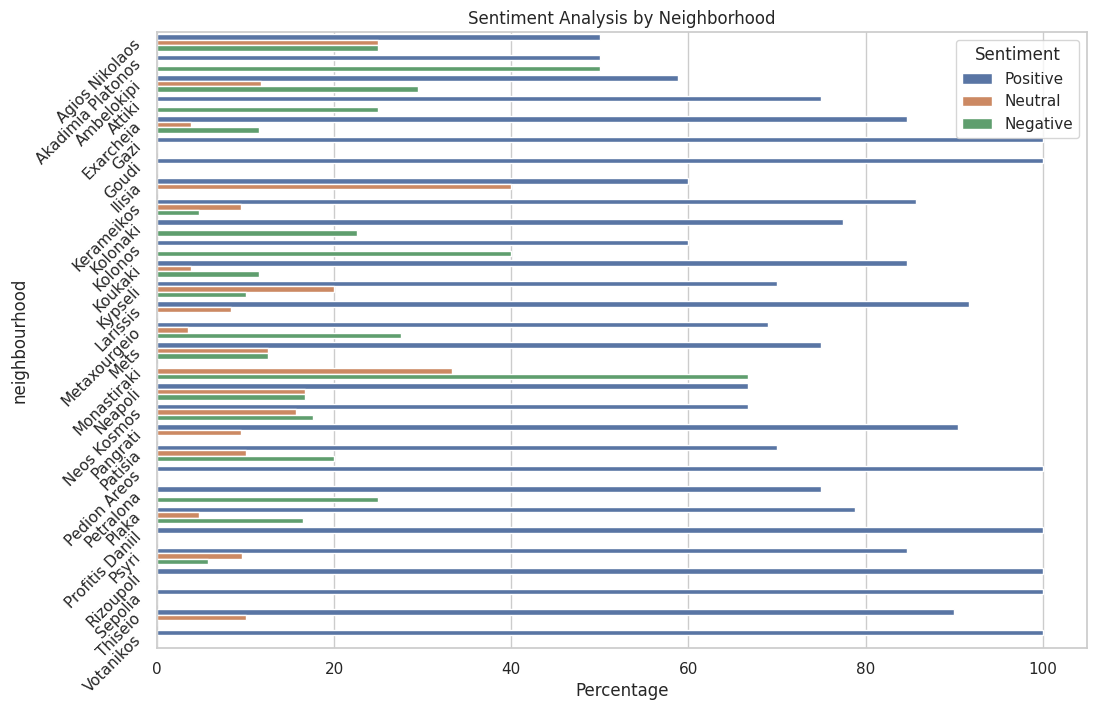

In [178]:
sentiment_count = results_df.groupby(['neighbourhood', 'sentiment']).size().unstack(fill_value=0)


sentiment_percentage = sentiment_count.div(sentiment_count.sum(axis=1), axis=0) * 100

sentiment_percentage.reset_index(inplace=True)
sentiment_percentage_melted = sentiment_percentage.melt(id_vars='neighbourhood', value_vars=['Positive', 'Neutral', 'Negative'], var_name='Sentiment', value_name='Percentage')


plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_percentage_melted, y='neighbourhood', x='Percentage', hue='Sentiment')

plt.xlabel('Percentage')
plt.title('Sentiment Analysis by Neighborhood')
plt.yticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

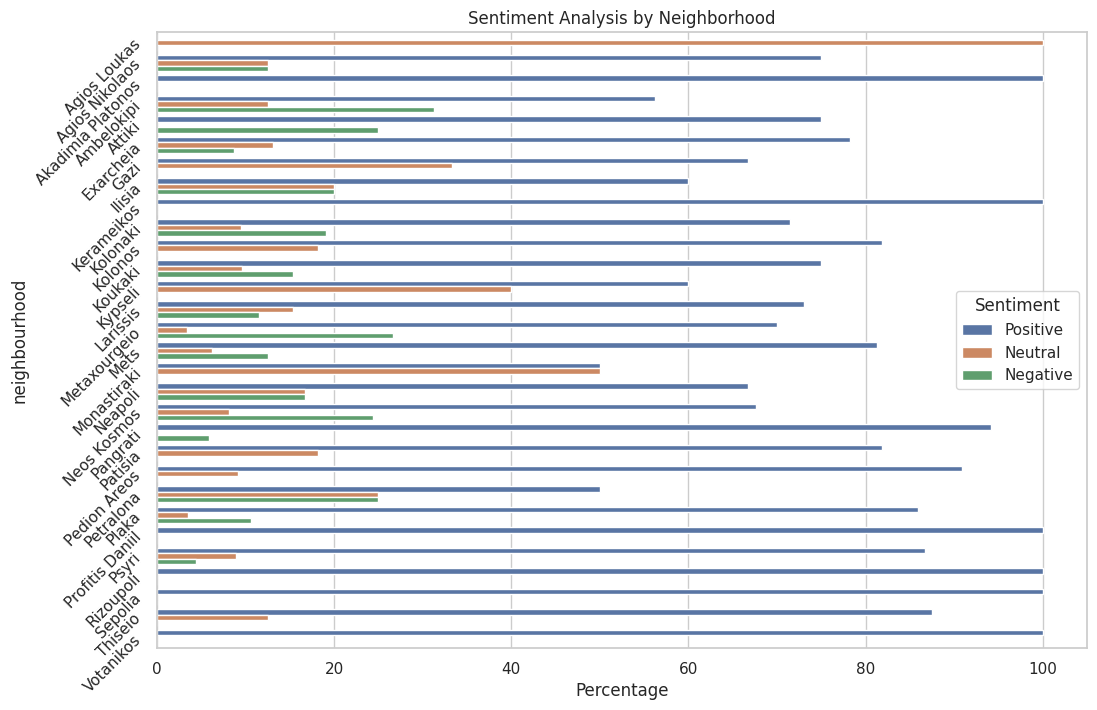

In [179]:
sentiment_count = results_df3.groupby(['neighbourhood', 'sentiment']).size().unstack(fill_value=0)


sentiment_percentage = sentiment_count.div(sentiment_count.sum(axis=1), axis=0) * 100

sentiment_percentage.reset_index(inplace=True)
sentiment_percentage_melted = sentiment_percentage.melt(id_vars='neighbourhood', value_vars=['Positive', 'Neutral', 'Negative'], var_name='Sentiment', value_name='Percentage')


plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_percentage_melted, y='neighbourhood', x='Percentage', hue='Sentiment')

plt.xlabel('Percentage')
plt.title('Sentiment Analysis by Neighborhood')
plt.yticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

Μελετώντας τα διαγράμματα ανάλυσης συναισθήματος για τα έτη 2019 και 2023, παρατηρούμε ότι κυριαρχεί ένα υψηλό ποσοστό θετικών συναισθημάτων στις περισσότερες γειτονιές. Τα αρνητικά συναισθήματα παραμένουν σχετικά χαμηλά και στα δύο έτη, αν και υπάρχουν κάποιες μεταβολές σε ειδικές περιπτώσεις. Σημαντική είναι η παρατήρηση ότι μερικές γειτονιές όπως το "Μεταξουργείο" και το "Μοναστηράκι" έχουν σημαντικά μειωμένο αρνητικό συναίσθημα το 2023. Επιπλέον, διαφοροποιήσεις στο ουδέτερο συναίσθημα γίνονται εμφανείς, με ορισμένες περιοχές να δείχνουν αύξηση και άλλες μείωση.

In [180]:
results_df.head(3)

,listing_id,neg,neu,pos,comments,review,sentiment,rev_id,neighbourhood
0,1216176,0.003715,0.041920,0.954365,It is rare in the Airbnb world to enter an apa...,rare airbnb world enter apartment look exactly...,Positive,332384360,Plaka
3,21874640,0.004309,0.060271,0.935421,Great location for our stay in Athens. Walkabl...,great location stay athens walkable distance m...,Positive,601964658087757322,Koukaki
6,26832989,0.051602,0.215179,0.733219,The place is beautiful as per the pictures and...,place beautiful per pictures good location goo...,Positive,765553455,Neos Kosmos


In [181]:
results_df3.head(3)

,listing_id,neg,neu,pos,comments,review,sentiment,rev_id,neighbourhood
0,28398208,0.032943,0.120045,0.847013,The place is as described right in the middle ...,place described right middle action absolutely...,Positive,485276415223916677,Psyri
3,45541978,0.579365,0.368633,0.052003,"When I first walked in, it seemed like it was ...",first walked seemed like somewhat similar list...,Negative,658507704560087778,NaN
4,21641672,0.009343,0.074616,0.916041,Everything is perfect.<br/>Best view of Acropo...,everything perfectbrbest view acropolisbrnice ...,Positive,486229253,Plaka


#Ερώτημα 2
Στο συγκεκριμένο ερώτημα έχω απαντήσει σε όλα τα ερωτήματα στις ερωτήσεις του eclass αναφέρθηκε ότι μπορούμε να το κάνουμε μονο για το 2023 μιας και τα reviews του 2019 περιέχονται στου 2019

In [93]:
from sklearn.model_selection import train_test_split

# test size 20% train 80%
train_df, test_df = train_test_split(results_df3, test_size=0.20, random_state=42)
train = train_df
test = test_df

In [183]:
df3.head()

,id,listing_id,comments,review
0,485276415223916677,28398208,The place is as described right in the middle ...,place described right middle action absolutely...
1,658507704560087778,45541978,"When I first walked in, it seemed like it was ...",first walked seemed like somewhat similar list...
2,486229253,21641672,Everything is perfect.<br/>Best view of Acropo...,everything perfectbrbest view acropolisbrnice ...
3,520050061749451984,48582617,Its very disappointing when all these professi...,disappointing professional photos wideangle le...
4,547521534,29124107,"Stella an Niko are wonderful hosts, they make ...",stella niko wonderful hosts make every effort ...


In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip --no-check-certificate


--2024-06-17 16:55:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-17 16:55:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-17 16:55:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [24]:
ls

gdrive/            glove.6B.200d.txt  glove.6B.50d.txt  glove.6B.zip.1  glove.6B.zip.3  test.tsv
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip      glove.6B.zip.2  sample_data/    train.tsv


In [25]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [94]:
train_df.to_csv('train.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)


In [95]:
import numpy as np
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(results_df['review'], results_df['sentiment'], test_size=0.2, random_state=42)

train_df = pd.DataFrame({'review': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'review': X_test, 'sentiment': y_test})

train_df.to_csv('train_data.tsv', sep='\t', index=False)
test_df.to_csv('test_data.tsv', sep='\t', index=False)


if os.path.exists('train_tfidf.pkl') and os.path.exists('test_tfidf.pkl'):
    with open('train_tfidf.pkl', 'rb') as f:
        X_train_tfidf = pickle.load(f)
    with open('test_tfidf.pkl', 'rb') as f:
        X_test_tfidf = pickle.load(f)
else:
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    with open('train_tfidf.pkl', 'wb') as f:
        pickle.dump(X_train_tfidf, f)
    with open('test_tfidf.pkl', 'wb') as f:
        pickle.dump(X_test_tfidf, f)

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

def train_eval_models(X, y, models):
    results = {}
    skf = StratifiedKFold(n_splits=10)
    for name, model in models.items():
        scores = cross_validate(model, X, y, cv=skf, scoring=scorers)
        results[name] = {
            'Accuracy': np.mean(scores['test_accuracy']),
            'Precision': np.mean(scores['test_precision_macro']),
            'Recall': np.nan_to_num(np.mean(scores['test_recall_macro'])),
            'F1-Score': np.mean(scores['test_f1_macro'])
        }
    return results

results_tfidf = train_eval_models(X_train_tfidf, y_train, models)

for model_name, metrics in results_tfidf.items():
    print(f"{model_name} Results:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")
    print()



RandomForest Results:
Accuracy: 0.7748
Precision: 0.8666
Recall: 0.3993
F1-Score: 0.3920

SVM Results:
Accuracy: 0.7497
Precision: 0.9162
Recall: 0.3438
F1-Score: 0.3042

KNN Results:
Accuracy: 0.7909
Precision: 0.6789
Recall: 0.4922
F1-Score: 0.5082



In [96]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


Για να βρουμε καλύτερες παραμέτρους στο SVM ενδεικτικά τρέχω και ένα optuna study

In [97]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

def objective(trial):

    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e-1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    classifier = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)

    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
    return scores.mean()


study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=20)


print("Best hyperparameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)


best_classifier = SVC(**study.best_params)
best_classifier.fit(X_train_tfidf, y_train)



[I 2024-06-17 17:44:05,933] A new study created in memory with name: no-name-231a3347-31df-428e-b598-b2dfaa59601e
[I 2024-06-17 17:44:06,879] Trial 0 finished with value: 0.744685534591195 and parameters: {'C': 3298.3409312684303, 'gamma': 1.3175284074044697e-08, 'kernel': 'rbf'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:44:08,180] Trial 1 finished with value: 0.744685534591195 and parameters: {'C': 3.33886511860448e-06, 'gamma': 4.306495585025886e-09, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:44:09,767] Trial 2 finished with value: 0.744685534591195 and parameters: {'C': 1.7632592827961887e-08, 'gamma': 3.3530299608788734e-08, 'kernel': 'poly'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:44:10,781] Trial 3 finished with value: 0.744685534591195 and parameters: {'C': 3.4660105710840946e-08, 'gamma': 1.3106071486045335e-10, 'kernel': 'poly'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-

Best hyperparameters: {'C': 142610388.4010972, 'gamma': 8.000419343768438e-07, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8310377358490566


SVC(C=142610388.4010972, gamma=8.000419343768438e-07)

In [99]:
import numpy as np
import os
import pickle

def load_glove_embeddings(glove_path):
    if os.path.exists('glove_embeddings.pkl'):
        with open('glove_embeddings.pkl', 'rb') as f:
            embeddings_index = pickle.load(f)
    else:
        embeddings_index = {}
        with open(glove_path, 'r', encoding='utf-8') as file:
            for line in file:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
        with open('glove_embeddings.pkl', 'wb') as f:
            pickle.dump(embeddings_index, f)
    return embeddings_index

# glove_path = 'glove.6B.300d.txt'
# embeddings_index = load_glove_embeddings(glove_path)

def document_vector(doc, embeddings_index, dim=300):
    words = doc.split()
    word_embeddings = [embeddings_index.get(word, np.zeros(dim)) for word in words]
    if not word_embeddings:
        return np.zeros(dim)
    return np.mean(word_embeddings, axis=0)


if os.path.exists('X_train_vec.pkl') and os.path.exists('X_test_vec.pkl'):
    with open('X_train_vec.pkl', 'rb') as f:
        X_train_vec = pickle.load(f)
    with open('X_test_vec.pkl', 'rb') as f:
        X_test_vec = pickle.load(f)
else:
    X_train_vec = np.array([document_vector(doc, embedding_index) for doc in X_train])
    X_test_vec = np.array([document_vector(doc, embedding_index) for doc in X_test])
    with open('X_train_vec.pkl', 'wb') as f:
        pickle.dump(X_train_vec, f)
    with open('X_test_vec.pkl', 'wb') as f:
        pickle.dump(X_test_vec, f)


In [100]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

def train_eval_models(X, y, models):
    results = {}
    skf = StratifiedKFold(n_splits=10)

    for name, model in models.items():
        scores = cross_validate(model, X, y, cv=skf, scoring=scorers)
        results[name] = {
            'Accuracy': np.mean(scores['test_accuracy']),
            'Precision': np.mean(scores['test_precision_macro']),
            'Recall': np.nan_to_num(np.mean(scores['test_recall_macro'])),
            'F1-Score': np.mean(scores['test_f1_macro'])
        }
    return results


results_glove = train_eval_models(X_train_vec, y_train, models)


for model_name, metrics in results_glove.items():
    print(f"{model_name} Results:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")
    print()

RandomForest Results:
Accuracy: 0.8098
Precision: 0.8249
Recall: 0.4735
F1-Score: 0.4748

SVM Results:
Accuracy: 0.8335
Precision: 0.8590
Recall: 0.5409
F1-Score: 0.5292

KNN Results:
Accuracy: 0.8111
Precision: 0.5859
Recall: 0.5318
F1-Score: 0.5461



Στα embeddings τα αποτελεσματα βελτιωθηκαν

In [101]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

def objective(trial):

    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e-1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    classifier = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)

    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
    return scores.mean()


study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=20)


print("Best hyperparameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)


best_classifier = SVC(**study.best_params)
best_classifier.fit(X_train_vec, y_train)

[I 2024-06-17 17:47:20,331] A new study created in memory with name: no-name-d8cb67e7-ab2d-4d34-bbc7-2df3fc6a8e68
[I 2024-06-17 17:47:23,751] Trial 0 finished with value: 0.744685534591195 and parameters: {'C': 1.054211364494499, 'gamma': 7.261735112447242e-07, 'kernel': 'poly'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:47:25,411] Trial 1 finished with value: 0.744685534591195 and parameters: {'C': 0.07865570347553098, 'gamma': 1.2195149602998995e-05, 'kernel': 'rbf'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:47:27,016] Trial 2 finished with value: 0.744685534591195 and parameters: {'C': 0.0003238761554071651, 'gamma': 0.0003540813199810426, 'kernel': 'poly'}. Best is trial 0 with value: 0.744685534591195.
[I 2024-06-17 17:47:30,845] Trial 3 finished with value: 0.8247955974842768 and parameters: {'C': 8655576395.582914, 'gamma': 1.8553067066720382e-05, 'kernel': 'linear'}. Best is trial 3 with value: 0.8247955974842768.
[I 2024-06-17 17:47

Best hyperparameters: {'C': 8655576395.582914, 'gamma': 1.8553067066720382e-05, 'kernel': 'linear'}
Best cross-validation accuracy: 0.8247955974842768


SVC(C=8655576395.582914, gamma=1.8553067066720382e-05, kernel='linear')

#Ερώτημα 3

Έχουν υλοποιηθεί όλα τα ερωτήματα

Στις συζητησεις στο eclass αναφερθηκε η δημιουργια πινακα με τις 300 πιο συχνες λέξεις

In [64]:
from collections import Counter


def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    words = text.split()

    words = [word for word in words if word.lower() != 'brthe']
    return words


all_words = []
for review in results_df['review']:
    all_words.extend(preprocess_text(review))

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]


word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(300)


most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


pd.set_option('display.max_rows', 300)
print(most_common_words_df)

              Word  Frequency
0        apartment        846
1            place        602
2            great        597
3              bad        526
4             stay        522
5               us        480
6         location        441
7            clean        394
8             host        385
9            would        369
10            good        369
11          athens        360
12            nice        359
13      everything        326
14             one        294
15            also        264
16           night        259
17          really        257
18            even        216
19            walk        214
20            time        214
21            like        210
22       recommend        200
23            room        200
24           close        189
25            well        188
26         amazing        181
27             get        181
28            area        176
29           didnt        175
30       acropolis        162
31            need        161
32        

In [65]:
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity


def load_glove_model(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

def make_embedding_matrix(texts, embedding_index, embedding_dim=300):
    matrix = np.zeros((len(texts), embedding_dim))
    for i, text in enumerate(texts):
        embeddings = [embedding_index[word] for word in text.split() if word in embedding_index]
        if embeddings:
            matrix[i] = np.mean(embeddings, axis=0)
    return matrix

glove_path = 'glove.6B.300d.txt'
glove_model = load_glove_model(glove_path)

# model = glove_model


# words = most_common_words_df['Word']
# word_vectors = [model[word] for word in words if word in model]

# similarity_matrix = cosine_similarity(word_vectors)

# similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)



KeyboardInterrupt: 

In [66]:
embedding_index = glove_model
subset_words = most_common_words_df['Word'].tolist()
print(len(subset_words))


subset_vectors = {}

missing_words = []

for word in subset_words:
    if word in embedding_index:
        subset_vectors[word] = embedding_index[word]
    else:
        missing_words.append(word)

print(len(subset_vectors))
print("Missing word:", missing_words)


300
300
Missing word: []


In [67]:
embedding_index = glove_model
subset_words = most_common_words_df['Word'].tolist()
print(len(subset_words))
subset_vectors = {word: embedding_index[word] for word in subset_words if word in embedding_index}
print(len(subset_vectors))

300
300


In [69]:
word_vectors = np.array([subset_vectors[word] for word in subset_words if word in subset_vectors])
cosine_sim_matrix = cosine_similarity(word_vectors)

In [70]:
similarity_df = pd.DataFrame(cosine_sim_matrix, index=subset_words, columns=subset_words)

#1ος τρόπος

In [81]:
def max_similarity_of_neighborhoods(word_i, word_j, neighbors_i, neighbors_j, similarity_df, N):
    if word_i not in similarity_df.index or word_j not in similarity_df.index:
        return None

    neighbors_j_excl_i = [word for word in neighbors_j if word != word_i]
    neighbors_i_excl_j = [word for word in neighbors_i if word != word_j]
    similarities_i = similarity_df.loc[word_i, neighbors_j_excl_i].head(N)
    similarities_j = similarity_df.loc[word_j, neighbors_i_excl_j].head(N)

    max_sim_i = similarities_i.max() if not similarities_i.empty else None
    max_sim_j = similarities_j.max() if not similarities_j.empty else None

    if max_sim_i is None and max_sim_j is None:
        return None

    return max(max_sim_i, max_sim_j)

In [72]:
import random
random_pair = random.sample(subset_words, 2)
word_i, word_j = random_pair

In [73]:
random_pair

['didnt', 'easy']

In [87]:
similarity = max_similarity_of_neighborhoods(word_i, word_j, subset_words, subset_words, similarity_df,300)
print(f'Maximum similarity between {word_i} and {word_j} neighborhoods: {similarity}')


Maximum similarity between didnt and easy neighborhoods: 0.6606553792953491


#2ος τρόπος

In [76]:
from scipy.stats import pearsonr
def correlation_of_neighborhoods(word_i, word_j, neighbors_i, neighbors_j, similarity_df,N):
    if word_i not in similarity_df.index or word_j not in similarity_df.index:
        return None


    neighbors_j_excl_i = [word for word in neighbors_j if word != word_i]
    neighbors_i_excl_j = [word for word in neighbors_i if word != word_j]


    similarities_i = similarity_df.loc[word_i, neighbors_j_excl_i].head(N)
    similarities_j = similarity_df.loc[word_j, neighbors_i_excl_j].head(N)

    if len(similarities_i) == 0 or len(similarities_j) == 0:
        return None


    if len(similarities_i) > 1 and len(similarities_j) > 1:
        beta_ij, _ = pearsonr(similarities_i, similarities_j)
        beta_ji, _ = pearsonr(similarity_df.loc[neighbors_j_excl_i, word_i].values, similarity_df.loc[neighbors_i_excl_j, word_j].values)
        return max(beta_ij, beta_ji)
    else:
        return None


similarity = correlation_of_neighborhoods(word_i, word_j, subset_words, subset_words, similarity_df,300)
print(f'Correlation of neighborhood similarities between {word_i} and {word_j}: {similarity}')

Correlation of neighborhood similarities between didnt and easy: 0.16225281135221686


In [82]:
def sum_squared_neighborhood_similarities(word_i, word_j, neighbors_i, neighbors_j, similarity_df,N):
    if word_i not in similarity_df.index or word_j not in similarity_df.index:
        return None


    neighbors_j_excl_i = [word for word in neighbors_j if word != word_i]
    neighbors_i_excl_j = [word for word in neighbors_i if word != word_j]


    similarities_i = similarity_df.loc[word_i, neighbors_j_excl_i].head(N)
    similarities_j = similarity_df.loc[word_j, neighbors_i_excl_j].head(N)

    if len(similarities_i) == 0 or len(similarities_j) == 0:
        return None
    sum_squared_similarities = np.sqrt(np.sum(similarities_i**2) + np.sum(similarities_j**2))

    return sum_squared_similarities

similarity = sum_squared_neighborhood_similarities(word_i, word_j, subset_words, subset_words, similarity_df,N)
print(f'Sum of squared neighborhood similarities between {word_i} and {word_j}: {similarity}')

Sum of squared neighborhood similarities between didnt and easy: 0.7745720744132996


In [78]:
def get_top_n_neighbors(word, similarity_df, N):
    if word not in similarity_df.index:
        return None
    similarities = similarity_df.loc[word].sort_values(ascending=False)
    top_n_neighbors = similarities.index[1:N+1]
    return top_n_neighbors


words = similarity_df.index.tolist()
N = 5


neighborhoods = {word: get_top_n_neighbors(word, similarity_df, N) for word in words}


for word, neighbors in neighborhoods.items():
    print(f'Word: {word}, Top {N} Neighbors: {list(neighbors)}')

Word: apartment, Top 5 Neighbors: ['apartments', 'bedroom', 'building', 'neighborhood', 'room']
Word: place, Top 5 Neighbors: ['places', 'time', 'take', 'next', 'took']
Word: great, Top 5 Neighbors: ['good', 'well', 'especially', 'much', 'wonderful']
Word: bad, Top 5 Neighbors: ['good', 'things', 'thing', 'really', 'nothing']
Word: stay, Top 5 Neighbors: ['staying', 'leave', 'stayed', 'go', 'want']
Word: us, Top 5 Neighbors: ['see', 'would', 'come', 'way', 'think']
Word: location, Top 5 Neighbors: ['located', 'area', 'places', 'near', 'nearby']
Word: clean, Top 5 Neighbors: ['cleaning', 'water', 'enough', 'safe', 'dirty']
Word: host, Top 5 Neighbors: ['hosts', 'guests', 'tv', 'next', 'night']
Word: would, Top 5 Neighbors: ['could', 'might', 'take', 'want', 'come']
Word: good, Top 5 Neighbors: ['better', 'really', 'always', 'well', 'excellent']
Word: athens, Top 5 Neighbors: ['acropolis', 'city', 'outside', 'near', 'took']
Word: nice, Top 5 Neighbors: ['wonderful', 'pretty', 'good', 'lo

Πως αλλάζει η ομοιότητα με την αλλαγή του Ν

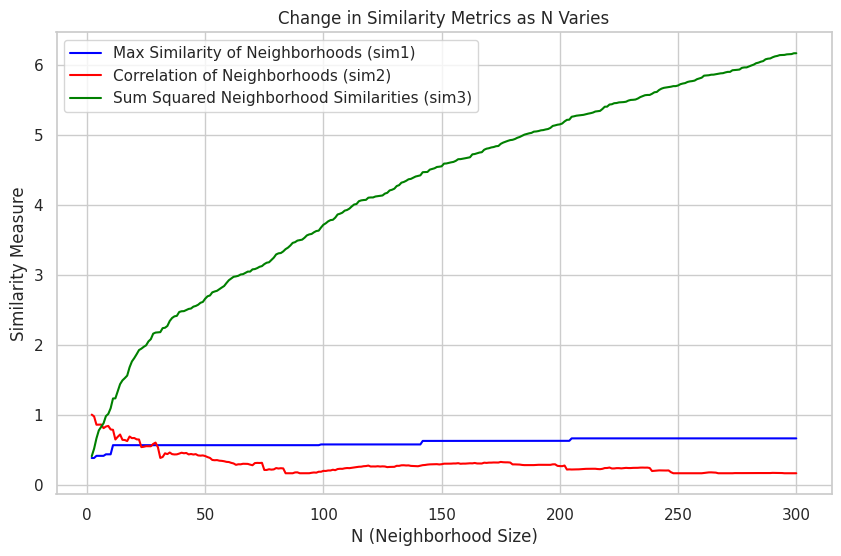

In [88]:
N_values = range(2, 301)
sim1_values = [max_similarity_of_neighborhoods(word_i, word_j, subset_words, subset_words, similarity_df,N) for N in N_values]
sim2_values = [correlation_of_neighborhoods(word_i, word_j, subset_words, subset_words, similarity_df,N) for N in N_values]
sim3_values = [sum_squared_neighborhood_similarities(word_i, word_j, subset_words, subset_words, similarity_df,N) for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, sim1_values, label='Max Similarity of Neighborhoods (sim1)', color='blue')
plt.plot(N_values, sim2_values, label='Correlation of Neighborhoods (sim2)', color='red')
plt.plot(N_values, sim3_values, label='Sum Squared Neighborhood Similarities (sim3)', color='green')
plt.xlabel('N (Neighborhood Size)')
plt.ylabel('Similarity Measure')
plt.title('Change in Similarity Metrics as N Varies')
plt.legend()
plt.grid(True)
plt.show()


Max Similarity of Neighborhoods (sim1) - Παραμένει σχεδόν σταθερή καθ' όλη τη διάρκεια της αύξησης του
𝑁
N. Αυτό υποδηλώνει ότι η μέγιστη ομοιότητα μεταξύ γειτονικών στοιχείων δεν επηρεάζεται σημαντικά από το μέγεθος της γειτονιάς.

Correlation of Neighborhoods (sim2) - Αυτή η μετρική επίσης παραμένει σχεδόν σταθερή και πολύ χαμηλά στο διάγραμμα, κάτω από το 1, όπου δεν φαίνεται να αυξάνεται ή να μειώνεται με την αλλαγή του
𝑁
N. Αυτό υποδηλώνει ότι η συσχέτιση μεταξύ των γειτονιών παραμένει αρκετά σταθερή ανεξάρτητα από το μέγεθος της γειτονιάς.

Sum Squared Neighborhood Similarities (sim3) - Εδώ βλέπουμε μια σαφή αύξηση καθώς το
𝑁
N αυξάνεται. Αυτό υποδηλώνει ότι η συνολική ομοιότητα μεταξύ των γειτονικών στοιχείων, σε τετραγωνική μορφή, αυξάνεται σημαντικά όταν το μέγεθος της γειτονιάς αυξάνεται.

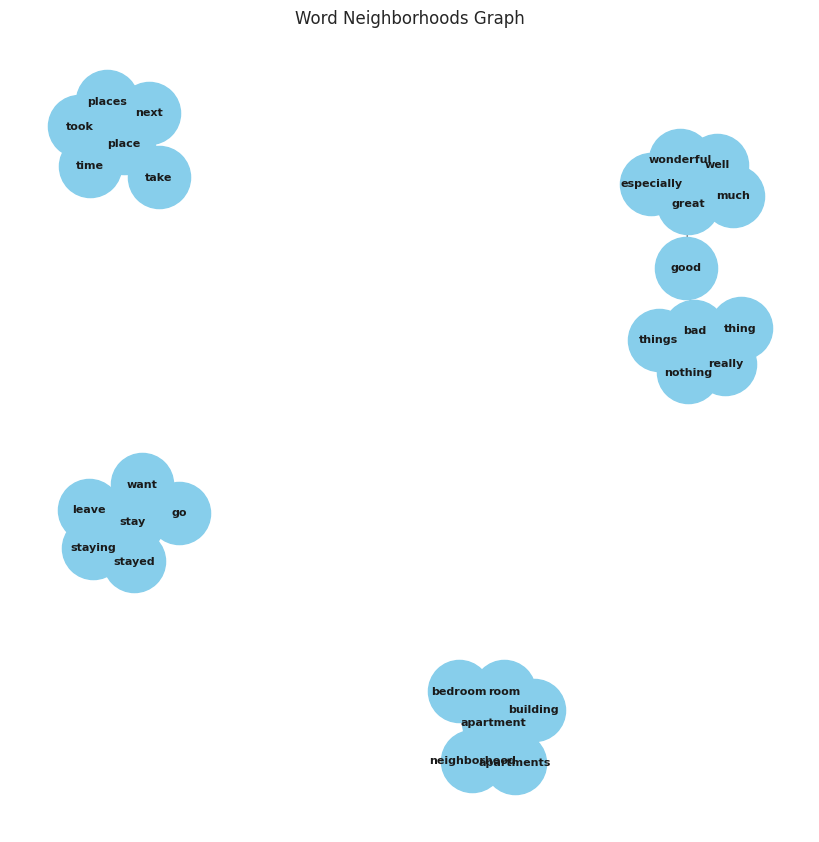

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice

G = nx.Graph()

for word, neighbors in islice(neighborhoods.items(), 5):
    for neighbor in neighbors:
        G.add_edge(word, neighbor)

pos = nx.spring_layout(G)


plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=8, font_weight='bold')
plt.title('Word Neighborhoods Graph')
plt.show()
